<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/PracticasDeDesarrollo/2_Desarrollo_II/1_EntornosVirtuales/clase_02_venv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" data-canonical-src="https://colab.research.google.com/assets/colab-badge.svg"></a>

# 1. CONDA: Gestor de paquetes y ambientes

<a href="https://docs.conda.io/en/latest/">
<img alt="Logo de Conda" src="https://raw.githubusercontent.com/institutohumai/cursos-python/master/PracticasDeDesarrollo/2_Desarrollo_II/1_EntornosVirtuales/images/conda_logo.svg" />
</a>

## 1.1. Introducción a conceptos básicos

### ¿Qué es CONDA?

&nbsp;&nbsp;&nbsp;&nbsp;**CONDA** es un gestor de paquetes que al igual el querido (?) PIP se encarga de instalar todas las dependencias que necesitemos para nuestros proyectos de desarrollo, asi cómo gestionar el ambiente virtual en donde se van a instalar.

### ¿Qué es un ambiente virtual?

>"Un entorno cooperativamente aislado de ejecución que permite a los usuarios de Python y a las aplicaciones instalar y actualizar paquetes de distribución de Python sin interferir con el comportamiento de otras aplicaciones de Python en el mismo sistema." - [Python Docs](https://docs.python.org/es/3/glossary.html#term-virtual-environment)

&nbsp;&nbsp;&nbsp;&nbsp;Dicho de otra manera, un ambiente virtual es lo que nos permite aislar el proyecto actual en el que estemos trabajando del resto de los proyectos que tambien estamos trabajando o, por ejemplo, del ambiente que es requerido para que nuestro sistema funcione correctamente.

### ¿Para qué necesitamos aislar nuestro proyecto?

&nbsp;&nbsp;&nbsp;&nbsp;Nada mejor que responder una pregunta con otra: 

`¿Qué hacemos si el proyecto A requiere la version 2.8 de una librería y el proyecto B requiere la version 3.4?`

&nbsp;&nbsp;&nbsp;&nbsp; En ese caso cada vez que quisieramos cambiar de proyecto, tendríamos que desinstalar la versión anterior e instalar la nueva. Para evitar tener que hacer esto, podemos hacer uso de un **ambiente virtual** para que cada vez que queremos cambiar de proyecto solo tengamos que cambiar de ambiente y ambas versiones de la libreria puedan coexistir.

| <img alt="Ambientes Virtuales" src="https://raw.githubusercontent.com/institutohumai/cursos-python/master/PracticasDeDesarrollo/2_Desarrollo_II/1_EntornosVirtuales/images/ambientes_virtuales.webp" /> |
|:--:|
| *(source dataquest.io)*|
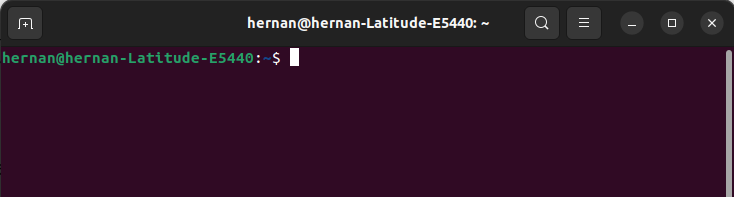


### Ok, ¿Entonces necesito CONDA para trabajar con ambientes virtuales?

&nbsp;&nbsp;&nbsp;&nbsp; Para nada. De hecho Python viene con un módulo standard llamado **venv** que sirve para hacer exactamente eso. Algunas herramientas que trás bambalinas lo utilizan son por ejemplo Pipenv o Poetry (de este último hablaremos más tarde ;) ).


&nbsp;&nbsp;&nbsp;&nbsp; Dicho esto existen diferencias entre usar un ambiente virtual + PIP VS CONDA y que estará en cada uno usar su criterio profesional (👀) para decidir en que momento conviene usar uno o el otro:

- Cuando hablamos de depencencias para nuestros proyectos normalmente nos referimos a librerias y las librerias de esas librerias, instalables con un simple `pip install mitadDeProyecto`; pero en varios casos las dependencias no son puras de Python y requieren que instalemos dependencias de sistemas usando el gestor de paquetes del mismo (apt, yum, brew, etc) para poder funcionar. Con CONDA, cuando agregamos una dependencia a nuestro proyecto, este se encarga de descargar e instalar todo lo requerido en el ambiente virtual.


- Cuando queremos crear un ambiente virtual con venv, necesitamos que exista una versión de Python en el sistema (sino, ¿de dónde va a sacar el paquete standard?). Esto hace que cada vez que necesitemos una versión específica de Python tendremos que instalarla para después generar un ambiente virtual de la misma. Vale la pena aclarar que existen herramientas para hacer eso, por ejemplo *Pyenv*. Con CONDA cuando creamos un ambiente virtual, este incluye a su vez su propia versión de Python cómo si fuera una dependencia más por lo que si se necesita una versión nueva simplemente se descargará.


- Con venv, podemos agregar 
paquetes con pip. En CONDA, con conda y pip.


- Como CONDA instala TODO lo que necesites, puede que en muchos casos los ambientes se vuelvan pesados. Este problema se presenta cuando las dependencias entre proyectos son casi las mismas, a diferencia de unas pocas. Y que al estar todas aisladas, se repiten multiples veces ocupando mucho espacio.

- CONDA no solo es un gestor de paquetes para Python. Puede gestionar paquetes de R, Ruby, Lua, Scala, Java, JavaScript, C, C++, FORTRAN.

- Otro concepto que los diferencia es que en CONDA tenemos canales (channels). En PIP todos los paquetes vienen de un mismo canal: [The Python Package Index](https://pypi.org/). En CONDA, existen diferentes canales desde donde descargar dependencias, oficiales y extraoficiales. El canal por defecto tiene un nombre increiblemente atípico llamado... [defaults](https://anaconda.org/anaconda/repo) y en donde para publicar paquetes en el mismo tenemos que pagar una licencia (solo para subir paquetes, es gratis de descargar). Este se podría considerar cómo el canal estable. Ahora, existe otro canal llamado [conda-forge](https://anaconda.org/conda-forge/repo) en donde es libre de subir paquetes y normalmente están más actualizados. Vale la pena mencionar que en un mismo ambiente pueden coexistir paquetes que vienen de diferentes canales pero puede llevar a incompatibilidades.



---

### 1.2 Instalación

&nbsp;&nbsp;&nbsp;&nbsp; Primero lo primero, vamos a instalar CONDA. Para eso tendremos que dirigirnos a este link: [INSTALACION CONDA](https://docs.conda.io/en/latest/miniconda.html) y seleccionar el link que querramos descargar de acuerdo a nuestro sistema operativo y la versión de python que querramos. En este caso estaremos instalando MINICONDA, que es una distribucion de CONDA cómo se muestra en la imagen siguiente.

| <img alt="Distribuciones de CONDA" src="https://raw.githubusercontent.com/institutohumai/cursos-python/master/PracticasDeDesarrollo/2_Desarrollo_II/1_EntornosVirtuales/images/conda-distributions.png" /> |
|:--:|
| *(source Planemo documentation)*|

&nbsp;&nbsp;&nbsp;&nbsp;Los pasos a seguir para la instalación en la terminal son:

```bash
curl -O https://repo.anaconda.com/miniconda/Miniconda3-py39_4.12.0-Linux-x86_64.sh # En este caso descargo la versión de Linux pero descargá la versión que corresponda
chmod +x Miniconda3-py39_4.12.0-Linux-x86_64.sh
./Miniconda3-py39_4.12.0-Linux-x86_64.sh
```
&nbsp;&nbsp;&nbsp;&nbsp;A partir de este momento nos aparecerá un prompt a seguir en donde iremos seleccionando la configuración que querramos (Si no sabés que es alguna opción no te preocupes y seleccioná la que viene por defecto).

&nbsp;&nbsp;&nbsp;&nbsp;Y voilá, tenemos CONDA! Siempre es bueno recordar que si recién terminamos de instalar CONDA, es recomendable trabajar en una terminal nueva o bien correr `source ~/.bashrc`.

&nbsp;&nbsp;&nbsp;&nbsp;Para verificar que todo esté funcionando bien, podemos correr:

```console
(base) root@a13f708282e0:/# conda -V
conda 4.12.0
```

&nbsp;&nbsp;&nbsp;&nbsp;Como podemos ver tenemos un "(base)" adelante de nuestro prompt, este es el ambiente por defecto de CONDA.

---

### 1.3 Creación de ambientes

&nbsp;&nbsp;&nbsp;&nbsp; Cómo mencionamos, **base** es el ambiente general y que probablemente querramos usar para el buen funcionamiento de nuestro ambiente de trabajo en general, no para un proyecto en específico, asique vamos a pasar a crear un nuevo ambiente para un nuevo proyecto de Data Science.

```bash 
conda create -n DataScience numpy pandas click=8.0.1 python=3.7
```

&nbsp;&nbsp;&nbsp;&nbsp; Expliquemos un poco el comando:
 * `conda create` crea un nuevo ambiente.
 * `-n DataScience` establece el nombre del nuevo ambiente.
 * `numpy pandas click=8.0.1` la lista de paquete que queremos que se instalen en la creación. El resultado es lo mismo que crear un ambiente "vacio" y posteriormente instalar los paquetes. (OPCIONAL)
 * `python=3.7` cómo mencionamos anteriormente *python* es una dependencia más, por lo que a modo de ejemplificar instalamos una versión especifica del mismo. Si no seleccionamos ninguna versión entonces usará la última disponible en el canal. (OPCIONAL)

*Para poder leer todos los posibles parametros simplemente podemos llamar `conda create -h`*

&nbsp;&nbsp;&nbsp;&nbsp; Pero si ya creé mi nuevo ambiente, ¿por qué sigo viendo "base"? Tenemos que activar el nuevo ambiente. Para "navegar" entre los distintos ambientes debemos activar/desactivar ambientes. Para saber cuales son los ambientes disponibles podemos correr:

```console
(base) root@a13f708282e0:/# conda env list
# conda environments:
#
base                  *  /root/miniconda3
DataScience              /root/miniconda3/envs/DataScience
```

&nbsp;&nbsp;&nbsp;&nbsp; Como podemos ver, tenemos 2 ambientes. Cambiemos al nuevo con:

```console
(base) root@a13f708282e0:/# conda activate DataScience
(DataScience) root@a13f708282e0:/# 
```

&nbsp;&nbsp;&nbsp;&nbsp; Y ahora si podemos ver que nuestro prompt cambio `base -> DataScience` para reflejar que estamos en el nuevo ambiente!

---

### 1.4 Instalación de paquetes

&nbsp;&nbsp;&nbsp;&nbsp; Genial. Ahora tenemos un ambiente en donde podemos empezar a desarrollar nuestro proyecto y está activo.

&nbsp;&nbsp;&nbsp;&nbsp; Nos dirigimos al mismo y comenzamos a desarrollar. Llegado el momento, nos damos cuenta que necesitamos una nueva dependencia, en este caso el paquete *requests*. Para eso vamos a verifiar que exista en el canal que queremos.

```console

(DataScience) root@a13f708282e0:/# conda search requests
Loading channels: done
# Name                       Version           Build  Channel             
requests                      2.21.0       py27_1000  conda-forge         
requests                      2.21.0       py36_1000  conda-forge         
requests                      2.21.0       py37_1000  conda-forge         
requests                      2.22.0          py27_0  conda-forge         
requests                      2.22.0          py27_1  conda-forge         
requests                      2.22.0          py36_0  conda-forge         
requests                      2.22.0          py36_1  conda-forge   
...
``` 

&nbsp;&nbsp;&nbsp;&nbsp; Habiendo encontrado el paquete que queremos pasaremos a instalarlo. Podemos especificar la versión deseada, el canal de instalación, entre otras opciones que siempre podemos encontrar acompañando el comando con "-h". Por ahora nos limitamos a instalar la última versión:

```console
(DataScience) root@a13f708282e0:/# conda install request
Collecting package metadata (current_repodata.json): done
Solving environment: done

## Package Plan ##

  environment location: /root/miniconda3/envs/DataScience

  added / updated specs:
    - request


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    request-2.83.1             |                0         973 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         973 KB

The following NEW packages will be INSTALLED:

  request            conda-forge/noarch::request-2.83.1-0


Proceed ([y]/n)? y


Downloading and Extracting Packages
request-2.83.1       | 973 KB    | ######################################################################################################################################################################## | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
```

&nbsp;&nbsp;&nbsp;&nbsp; Todo muy lindo, pero ¿cómo puedo doble chequear que el paquete se instaló correctamente? No os preocupeis. Para eso podemos listar todos los paquetes que tengamos en el ambiente actual:

```bash
conda list
```

&nbsp;&nbsp;&nbsp;&nbsp; Está bueno comentar que al momento de instalar una nueva dependencia podemos especificarle, al igual que en PIP, que versión queremos; ya sea fijando la versión específica que queremos o bien estableciendo pisos y techos de las versiones que queremos soportar.

&nbsp;&nbsp;&nbsp;&nbsp; Si en algún momento instalamos una dependencia que no debiamos, para probar o que simplemente no necesitamos más, el proceso para eliminarla es sencillo:

```bash
conda uninstall requests

```

---

### 1.5 Actualización de paquetes

&nbsp;&nbsp;&nbsp;&nbsp; El tiempo pasa y con él el ciclo de vida de los bugs: Se eliminan 5 y se crean 17. Pero más allá de los nuevos, quienes mantienen la librería que es clave para nuestro proyecto, arreglaron el bug que nos impedía seguir, por lo que deberiamos actualizar a una nueva versión.

| <img alt="El que no buguea, no programa" src="https://raw.githubusercontent.com/institutohumai/cursos-python/master/PracticasDeDesarrollo/2_Desarrollo_II/1_EntornosVirtuales/images/little-bugs.jpeg" />
|:--:|
| *(source Imgur)*|

Para instalar una nueva versión de un nuevo paquete especifico, corremos:
```console
(DataScience) root@a13f708282e0:/# conda update click   
Collecting package metadata (current_repodata.json): done
Solving environment: done

## Package Plan ##

  environment location: /root/miniconda3/envs/DataScience

  added / updated specs:
    - click


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    click-8.1.3                |   py37hfd236b0_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         145 KB

The following packages will be UPDATED:

  click              pkgs/main/noarch::click-8.0.3-pyhd3eb~ --> conda-forge/linux-aarch64::click-8.1.3-py37hfd236b0_0


Proceed ([y]/n)? y


Downloading and Extracting Packages
click-8.1.3          | 145 KB    | ######################################################################################################################################################################## | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
```

Y seguimos... Si en algún momento queremos actualizar todos los paquetes podemos correr `conda update --all`, pero cuidado que esto puedo desestabilizar el ambiente.

---

### 1.7 Compartiendo ambientes

&nbsp;&nbsp;&nbsp;&nbsp; Tenemos nuestro ambiente creado y con el proyecto corriendo en "optimas condiciones". Una compañera nos dice que intentó correr el proyecto pero no le funcionó con la misma data y el mismo código... Raro. ¿El contexto será el mismo?. Para asegurarnos pasemosle el ambiente entero.

&nbsp;&nbsp;&nbsp;&nbsp; Para eso exportemos el ambiente a un archivo para poder pasarselo y de paso generar una versión de nuestro ambiente por si en el futuro inevitable el ambiente se vuelve inestable:
```bash
conda env export > ENV.yml
```


&nbsp;&nbsp;&nbsp;&nbsp; Esto nos debería haber creado un archivo llamado "ENV.yml" que podemos compartir para poder crear ambientes con todas las dependencias que tenemos actualmente. El comando es similar a correr `pip freeze` en un ambiente gestionado con PIP.

&nbsp;&nbsp;&nbsp;&nbsp; Enviado el archivo, lo que podemos hacer es crear un ambiente a partir de dicho archivo:

```bash
conda env create --file ENV.yml
```

&nbsp;&nbsp;&nbsp;&nbsp; Y ahora ambos tienen el mismo ambiente. Cabe aclarar que en este caso no le indicamos el nombre del ambiente que vamos a crear porque viene integrado adentro del archivo de configuración, pero tranquilamente podemos cambiarlo usando el parámetro "-n".


---

### 1.8 Conclusiones

&nbsp;&nbsp;&nbsp;&nbsp; Terminando de trabajar en un proyecto lo mejor es volver al ambiente principal. Para esto podemos:
  * Activar el ambiente base: `conda activate base`
  * Salir de nuestro ambiente, lo que nos permitirá volver al base (o al menos al anterior): `conda deactivate`

*Si lo que queremos es cambiar de ambientes para trabajar en otro proyecto podemos simplemente activar un ambiente desde otro. No es necesario "pasar" por base*.

Con esto vimos que es un ambiente virtual y los comandos básicos de CONDA para crear un ambiente, gestionarlo, agregarle paquetes, actualizarlos y eliminarlos.
En la carpeta [*resources*](resources/conda-cheatsheet.pdf) podemos encontrar un buen cheatsheet hecho por Anaconda.